### Fake News Classifier using Machine Learning and NLP Techniques

Based on the dataset at https://www.kaggle.com/c/fake-news/data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("fake-news/train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
## Independent Feature

x = df.drop("label",axis=1)

In [5]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
# Dependent Feature

y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [7]:
df.shape

(20800, 5)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [9]:
df = df.dropna()

In [10]:
messages = df.copy()

In [11]:
## Reset index after removal of NAn values

messages.reset_index(inplace=True)
messages.head(7)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0


In [13]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [19]:
## Apply CountVerctorizer
# Create Bag of Words model (I)

from sklearn.feature_extraction.text import CountVectorizer
cv  = CountVectorizer(max_features=6000, ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()

In [23]:
x.shape

(18285, 6000)

In [24]:
y = messages['label']

In [25]:
## Divide dataset into Train and Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [26]:
cv.get_feature_names()[:20]

['aaron',
 'ab',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'aboard',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'abstain un',
 'abstain un vote',
 'absurd',
 'abu',
 'abus']

In [28]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 6000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [29]:
count_df = pd.DataFrame(x_train, columns=cv.get_feature_names())

In [32]:
count_df.head()

,aaron,ab,abandon,abba,abc,abc news,abduct,abe,abedin,abl,...,zika new,zika new york,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Confusion Matrix

In [33]:
import matplotlib.pyplot as plt

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Source code for CnfM from -
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [40]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [41]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy = 0.902
Confusion matrix, without normalization


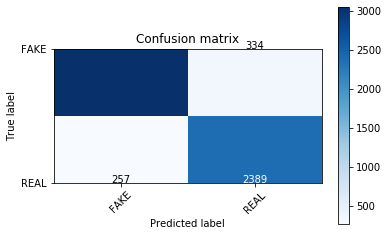

In [47]:
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy = %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [69]:
print("Accuracy =", round(score*100,2))

Accuracy = 90.21


### Passive Aggressive Classifier Algorithm

In [75]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

Accuracy = 0.922
Confusion matrix, without normalization


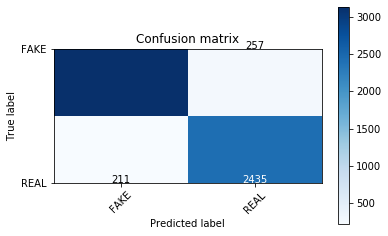

In [77]:
linear_clf.fit(x_train,y_train)
pred = linear_clf.predict(x_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy = %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Multinomial Classifier with Hyperparameter

In [78]:
classifier = MultinomialNB(alpha=0.1)

In [86]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(x_train, y_train)
    y_pred = sub_classifier.predict(x_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("Alpha: {}, Score: {}%".format(alpha, round(score,4)*100))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score: 88.52%
Alpha: 0.1, Score: 90.29%
Alpha: 0.2, Score: 90.29%
Alpha: 0.30000000000000004, Score: 90.27%
Alpha: 0.4, Score: 90.27%
Alpha: 0.5, Score: 90.24%
Alpha: 0.6000000000000001, Score: 90.19%
Alpha: 0.7000000000000001, Score: 90.31%
Alpha: 0.8, Score: 90.31%
Alpha: 0.9, Score: 90.24%


In [88]:
## Get Feature names
feature_names = cv.get_feature_names()

In [89]:
classifier.coef_[0]

array([-10.84713401,  -9.15253829,  -9.15253829, ..., -10.84713401,
        -8.96682115,  -9.38079695])

In [90]:
### Most Real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[0:20]

[(-4.052298615428397, 'trump'),
 (-4.340022153266952, 'hillari'),
 (-4.44853907988493, 'clinton'),
 (-4.952119185032147, 'elect'),
 (-5.228748059721167, 'new'),
 (-5.2868798251721785, 'comment'),
 (-5.326117639797042, 'video'),
 (-5.438966226941423, 'war'),
 (-5.448971312902385, 'us'),
 (-5.4641691738118165, 'hillari clinton'),
 (-5.469286892248797, 'fbi'),
 (-5.532833943365492, 'vote'),
 (-5.618404934678816, 'email'),
 (-5.630388301565913, 'world'),
 (-5.686164839023324, 'obama'),
 (-5.786650914596315, 'donald'),
 (-5.815244713963056, 'donald trump'),
 (-5.837239735548602, 'russia'),
 (-5.89837412404197, 'day'),
 (-5.91426008163078, 'america')]

In [91]:
### Most Fake
sorted(zip(classifier.coef_[0], feature_names))[0:20]

[(-10.847134014420138, 'aaron'),
 (-10.847134014420138, 'abe'),
 (-10.847134014420138, 'aboard'),
 (-10.847134014420138, 'abroad'),
 (-10.847134014420138, 'abus new'),
 (-10.847134014420138, 'abus new york'),
 (-10.847134014420138, 'acosta'),
 (-10.847134014420138, 'act new'),
 (-10.847134014420138, 'act new york'),
 (-10.847134014420138, 'advic'),
 (-10.847134014420138, 'advis new'),
 (-10.847134014420138, 'advis new york'),
 (-10.847134014420138, 'afford care'),
 (-10.847134014420138, 'afford care act'),
 (-10.847134014420138, 'age new'),
 (-10.847134014420138, 'age new york'),
 (-10.847134014420138, 'agenda breitbart'),
 (-10.847134014420138, 'ahca'),
 (-10.847134014420138, 'ahmad'),
 (-10.847134014420138, 'ail')]